<a href="https://colab.research.google.com/github/VoV4ikk66/SCM/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 18. Модель Вольтерра–Лотке
Рассмотрите *модель хищник–жертва* Вольтерра́–Лотке простой экосистемы
$$
\left\{
\begin{array}{l}
\frac{\displaystyle dr}{\displaystyle dt} = 2r - \alpha r f, \\[.5em]
\frac{\displaystyle df}{\displaystyle dt} = -f + \alpha r f, 
\end{array}
\right.
$$
$$
r(0) = r_0,\qquad
f(0) = f_0,
$$
где
$f$ – численность лис,
$r$ – численность кроликов
($\alpha$, например, $0.01$;
$r_0$, $f_0$ могут изменяться от нескольких единиц до нескольких тысяч) 

Напишите функцию, на вход которой можно подавать величины $\alpha$, $r_0$, $f_0$.
По заданным параметру и начальным условиям функция должна строить
три графика: графики зависимости $f(t)$, $r(t)$ и
*фазовую траекторию* (траекторию в плоскости $(r,f)$). 
Обратите внимание, что $r(t)\ge 0$, $f(t)\ge 0$.

Экспериментально попытайтесь найти все качественно различные фазовые траектории.
Изобразите *фазовый портрет* – коллекцию фазовых траекторий. 
Каков содержательный смысл в соответствующих этим траекториям решениях?



## Ход работы
Уравнения Лотки-Вольтерры, или уравнения "жертва-хищник", представляют собой пару нелинейных дифференциальных уравнений первого порядка, используемых для описания динамики биологических систем, в которых взаимодействуют два вида, один как хищник, а другой как добыча.

Подключаем бибилиотеку numPy для использования массивов и некоторых математических функций и matplotlib.pyplot для построения графиков.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Определяем функцию `volterra_lotke`, которая принимает на вход параметры `alpha`, `r0` и `f0`.

Внутри функции определяем еще одну функцию `f`, которая представляет собой систему дифференциальных уравнений модели Вольтерра-Лотке.

Создаем одномерный массив времени `ts` с помощью функции `np.linspace` и двумерный массив векторов состояния `rfs` с помощью функции `np.zeros`, здесь `len(ts)` - длина массива `ts`, то есть количество моментов времени, в которые нужно записать значения координат. Число 2 означает, что для каждого момента времени нужно хранить два значения координат. Далее задаем начальное состояние системы в массиве `rfs`.

В цикле происходит численное интегрирование системы дифференциальных уравнений методом Рунге-Кутты 4-го порядка. Метод заключается в том, что мы последовательно вычисляем значения функции в нескольких точках, используя предыдущие значения и информацию о скорости изменения функции. Затем мы усредняем эти значения и используем их для вычисления следующего значения функции. Таким образом, мы получаем более точное приближение к реальному решению дифференциального уравнения.В конце цикла проверяется, что численность кроликов и лис не стала отрицательной, и если это произошло, то она принимается равной нулю.

Создаем график численности кроликов в зависимости от времени, график численности лис в зависимости от времени, график численности кроликов и лис в зависимости от времени, и фазовую траекторию системы.

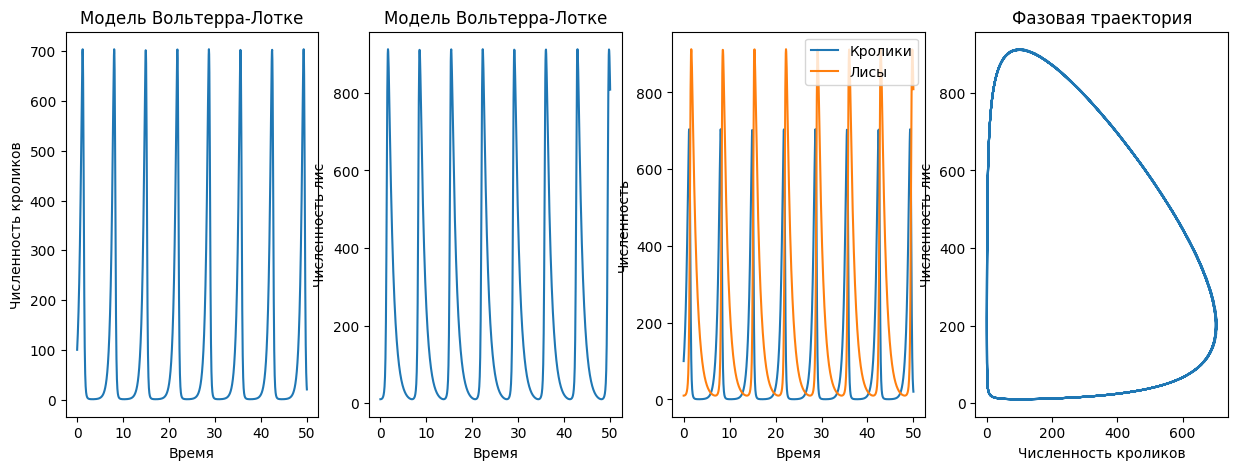

In [ ]:
def volterra_lotke(alpha, r0, f0):
    def f(rf, t):
        r, f = rf
        return np.array([2*r - alpha*r*f, -f + alpha*r*f])
    
    ts = np.linspace(0, 50, 1000)
    rfs = np.zeros((len(ts), 2))
    rfs[0] = [r0, f0]
    
    for i in range(1, len(ts)):
        h = ts[i] - ts[i-1]
        k1 = h * f(rfs[i-1], ts[i-1])
        k2 = h * f(rfs[i-1] + 0.5*k1, ts[i-1] + 0.5*h)
        k3 = h * f(rfs[i-1] + 0.5*k2, ts[i-1] + 0.5*h)
        k4 = h * f(rfs[i-1] + k3, ts[i-1] + h)
        rfs[i] = rfs[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        
        if rfs[i][0] < 0:
            rfs[i][0] = 0
        if rfs[i][1] < 0:
            rfs[i][1] = 0
    
    r = rfs[:, 0]
    f = rfs[:, 1]
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
   
    axs[0].plot(ts, r)
    axs[0].set_title("Модель Вольтерра-Лотке")
    axs[0].set_xlabel('Время')
    axs[0].set_ylabel('Численность кроликов')
    
    axs[1].plot(ts, f)
    axs[1].set_title("Модель Вольтерра-Лотке")
    axs[1].set_xlabel('Время')
    axs[1].set_ylabel('Численность лис')

    axs[2].plot(ts, r, label='Кролики')
    axs[2].plot(ts, f, label='Лисы')
    axs[2].set_xlabel('Время')
    axs[2].set_ylabel('Численность')
    axs[2].legend()
    
    axs[3].plot(r, f)
    axs[3].set_title("Фазовая траектория")
    axs[3].set_xlabel('Численность кроликов')
    axs[3].set_ylabel('Численность лис')
    
    
    plt.show()


volterra_lotke(0.01, 100, 10)



Для построения фазового портрета перебираются значения параметров `alpha`, `r0` и `f0` и для каждого значения происходит численное интегрирование системы дифференциальных уравнений и построение фазовой траектории на графике.

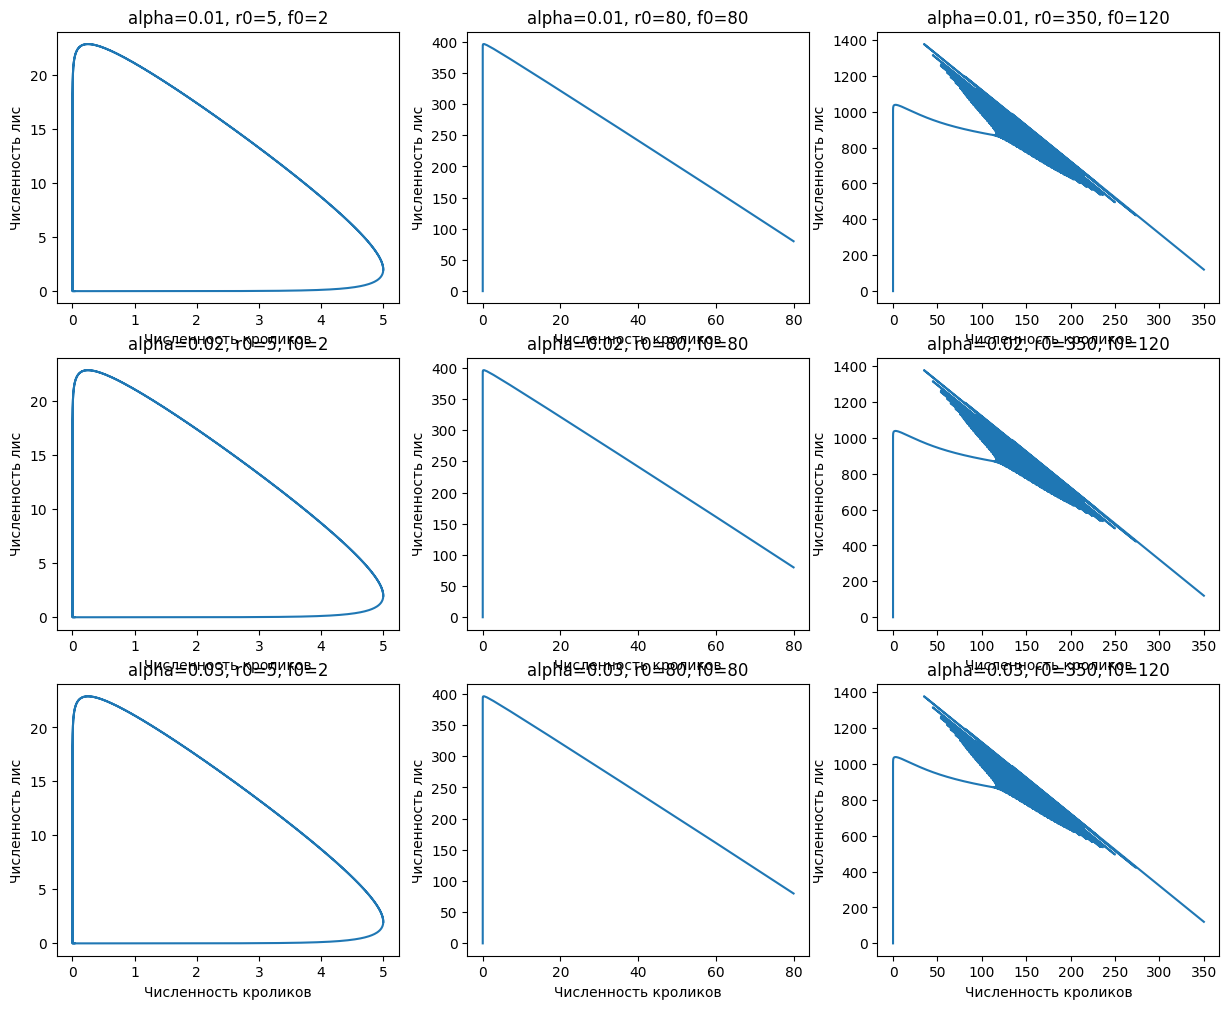

In [ ]:
alphas = [0.01, 0.02, 0.03]
r0s = [5, 80, 350]
f0s = [2, 80, 120]

fig, axs = plt.subplots(len(alphas), len(r0s), figsize=(15, 12))

for i in range(len(alphas)):
    for j in range(len(r0s)):
        alpha = alphas[i]
        r0 = r0s[j]
        f0 = f0s[j]
        
        ts = np.linspace(0, 50, 10000)
        rfs = np.zeros((len(ts), 2))
        rfs[0] = [r0, f0]

        for k in range(1, len(ts)):
            h = ts[k] - ts[k-1]
            k1 = h * f(rfs[k-1], ts[k-1])
            k2 = h * f(rfs[k-1] + 0.5*k1, ts[k-1] + 0.5*h)
            k3 = h * f(rfs[k-1] + 0.5*k2, ts[k-1] + 0.5*h)
            k4 = h * f(rfs[k-1] + k3, ts[k-1] + h)
            rfs[k] = rfs[k-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

            if rfs[k][0] < 0:
                rfs[k][0] = 0
            if rfs[k][1] < 0:
                rfs[k][1] = 0
        
        axs[i, j].plot(rfs[:, 0], rfs[:, 1])
        axs[i, j].set_xlabel('Численность кроликов')
        axs[i, j].set_ylabel('Численность лис')
        axs[i, j].set_title(f'alpha={alpha}, r0={r0}, f0={f0}')

plt.show()

Содержательный смысл различных фазовых траекторий заключается в том, что они отображают динамику численности кроликов и лис в зависимости от начальных условий и параметра a. Например, при малых начальных значениях численности кроликов и лис фазовая траектория может быть замкнутой и представлять собой периодически повторяющийся цикл, так как в простой экосистеме, где нет других факторов, влияющих на численность кроликов и лис (например, доступность пищи), они будут колебаться вокруг некоторых средних значений, не выйдя за определенные пределы, чтобы сохранить равновесие в системе. При больших значениях численности кроликов и лис траектория может быть ограниченной и представлять собой стационарное состояние, а при определенных значениях параметра a и начальных условиях траектория может быть хаотической и представлять собой непредсказуемую динамику численности кроликов и лис.
